### Importing Libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 
%matplotlib inline

from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
0,2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,0.421011,0.997131,none,47.108800,9214.535081,9196.119258,9524.945856,9671.528810,43
1,2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,0.366354,0.999726,none,48.843088,9202.486065,9206.292278,9560.413230,9718.271795,41
2,2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,0.404649,1.000724,buy,50.404638,9197.158852,9216.465298,9595.880603,9765.014781,44
3,2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,0.409607,1.000859,none,53.054470,9200.301081,9226.638318,9631.347977,9811.757766,41
4,2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,0.437860,1.000647,none,49.099864,9192.450865,9236.811338,9666.815351,9858.500751,44


In [4]:
data.describe()

,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
count,935.000000,935.000000,935.000000,935.000000,935.000000,9.350000e+02,935.000000,935.000000,9.350000e+02,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,32854.990235,33748.030417,31841.441326,32869.649166,19776.787469,2.655477e+06,0.010833,1.887077,2.638039e+08,0.364061,1.587759,1.005996,52.406224,32810.048490,32729.191448,32582.628701,32110.411317,45.706952
std,15586.619424,16026.828089,15051.951866,15570.876889,12739.460780,1.542206e+05,0.023959,0.773880,9.690276e+08,0.282549,0.797501,0.031463,14.396264,15497.199601,15382.324826,14982.202215,12293.601467,25.749944
min,9130.930000,9182.990000,9005.000000,9130.110000,3211.704593,2.214551e+06,-0.116700,0.759394,-4.302549e+09,-0.316839,0.366354,0.866222,20.285894,9192.450865,9196.119258,9524.945856,9671.528810,6.000000
25%,19239.850000,19554.870000,18850.245000,19258.600000,11166.544857,2.596823e+06,-0.000010,1.172578,-1.718159e+08,0.147169,0.905744,0.989412,41.382874,19322.981514,19417.071530,19207.403858,21255.649974,24.000000
50%,33077.430000,34231.540000,31432.190000,33080.660000,16961.108288,2.689092e+06,0.005040,1.806507,6.615847e+07,0.446445,1.483322,1.000418,50.496180,33560.442757,33620.120486,34805.448787,34449.423397,39.000000
75%,45709.475000,47058.655000,44145.240000,45705.135000,24086.969086,2.753680e+06,0.012384,2.382392,4.871924e+08,0.580254,2.219189,1.018265,61.468009,45330.585351,44958.719425,44505.259597,42075.874387,72.000000
max,67554.130000,69000.000000,66261.790000,67554.840000,119633.961941,2.947289e+06,0.154037,3.981206,5.863688e+09,0.748820,3.805708,1.193530,89.347312,64490.167763,63062.412439,59135.220214,50120.543237,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 935 non-null    object 
 1   open                     935 non-null    float64
 2   high                     935 non-null    float64
 3   low                      935 non-null    float64
 4   close                    935 non-null    float64
 5   volume                   935 non-null    float64
 6   reserve                  935 non-null    float64
 7   funding_rates            935 non-null    float64
 8   mvrv                     935 non-null    float64
 9   nrpl                     935 non-null    float64
 10  nupl                     935 non-null    float64
 11  stock_to_flow_reversion  935 non-null    float64
 12  sth_sopr                 935 non-null    float64
 13  signal                   935 non-null    object 
 14  RSI                      9

#### Converting date to datetime object and making it as index

In [6]:
data['datetime']

0      2020-07-16
1      2020-07-17
2      2020-07-18
3      2020-07-19
4      2020-07-20
          ...    
930    2023-02-01
931    2023-02-02
932    2023-02-03
933    2023-02-04
934    2023-02-05
Name: datetime, Length: 935, dtype: object

In [7]:
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d')

In [8]:
data.dtypes

datetime                   datetime64[ns]
open                              float64
high                              float64
low                               float64
close                             float64
volume                            float64
reserve                           float64
funding_rates                     float64
mvrv                              float64
nrpl                              float64
nupl                              float64
stock_to_flow_reversion           float64
sth_sopr                          float64
signal                             object
RSI                               float64
9_ema                             float64
21_ema                            float64
50_ema                            float64
200_ema                           float64
Fear_and_Greed_Index                int64
dtype: object

In [9]:
data.set_index('datetime',inplace=True)

In [10]:
data['datetime'] = data.index

In [11]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month

In [12]:
data.head()

,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,...,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index,datetime,year,month
datetime,,,,,,,,,,,,,,,,,,,,,
2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,...,none,47.108800,9214.535081,9196.119258,9524.945856,9671.528810,43,2020-07-16,2020,7
2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,...,none,48.843088,9202.486065,9206.292278,9560.413230,9718.271795,41,2020-07-17,2020,7
2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,...,buy,50.404638,9197.158852,9216.465298,9595.880603,9765.014781,44,2020-07-18,2020,7
2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,...,none,53.054470,9200.301081,9226.638318,9631.347977,9811.757766,41,2020-07-19,2020,7
2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,...,none,49.099864,9192.450865,9236.811338,9666.815351,9858.500751,44,2020-07-20,2020,7


In [13]:
data.isnull().sum()

open                       0
high                       0
low                        0
close                      0
volume                     0
reserve                    0
funding_rates              0
mvrv                       0
nrpl                       0
nupl                       0
stock_to_flow_reversion    0
sth_sopr                   0
signal                     0
RSI                        0
9_ema                      0
21_ema                     0
50_ema                     0
200_ema                    0
Fear_and_Greed_Index       0
datetime                   0
year                       0
month                      0
dtype: int64

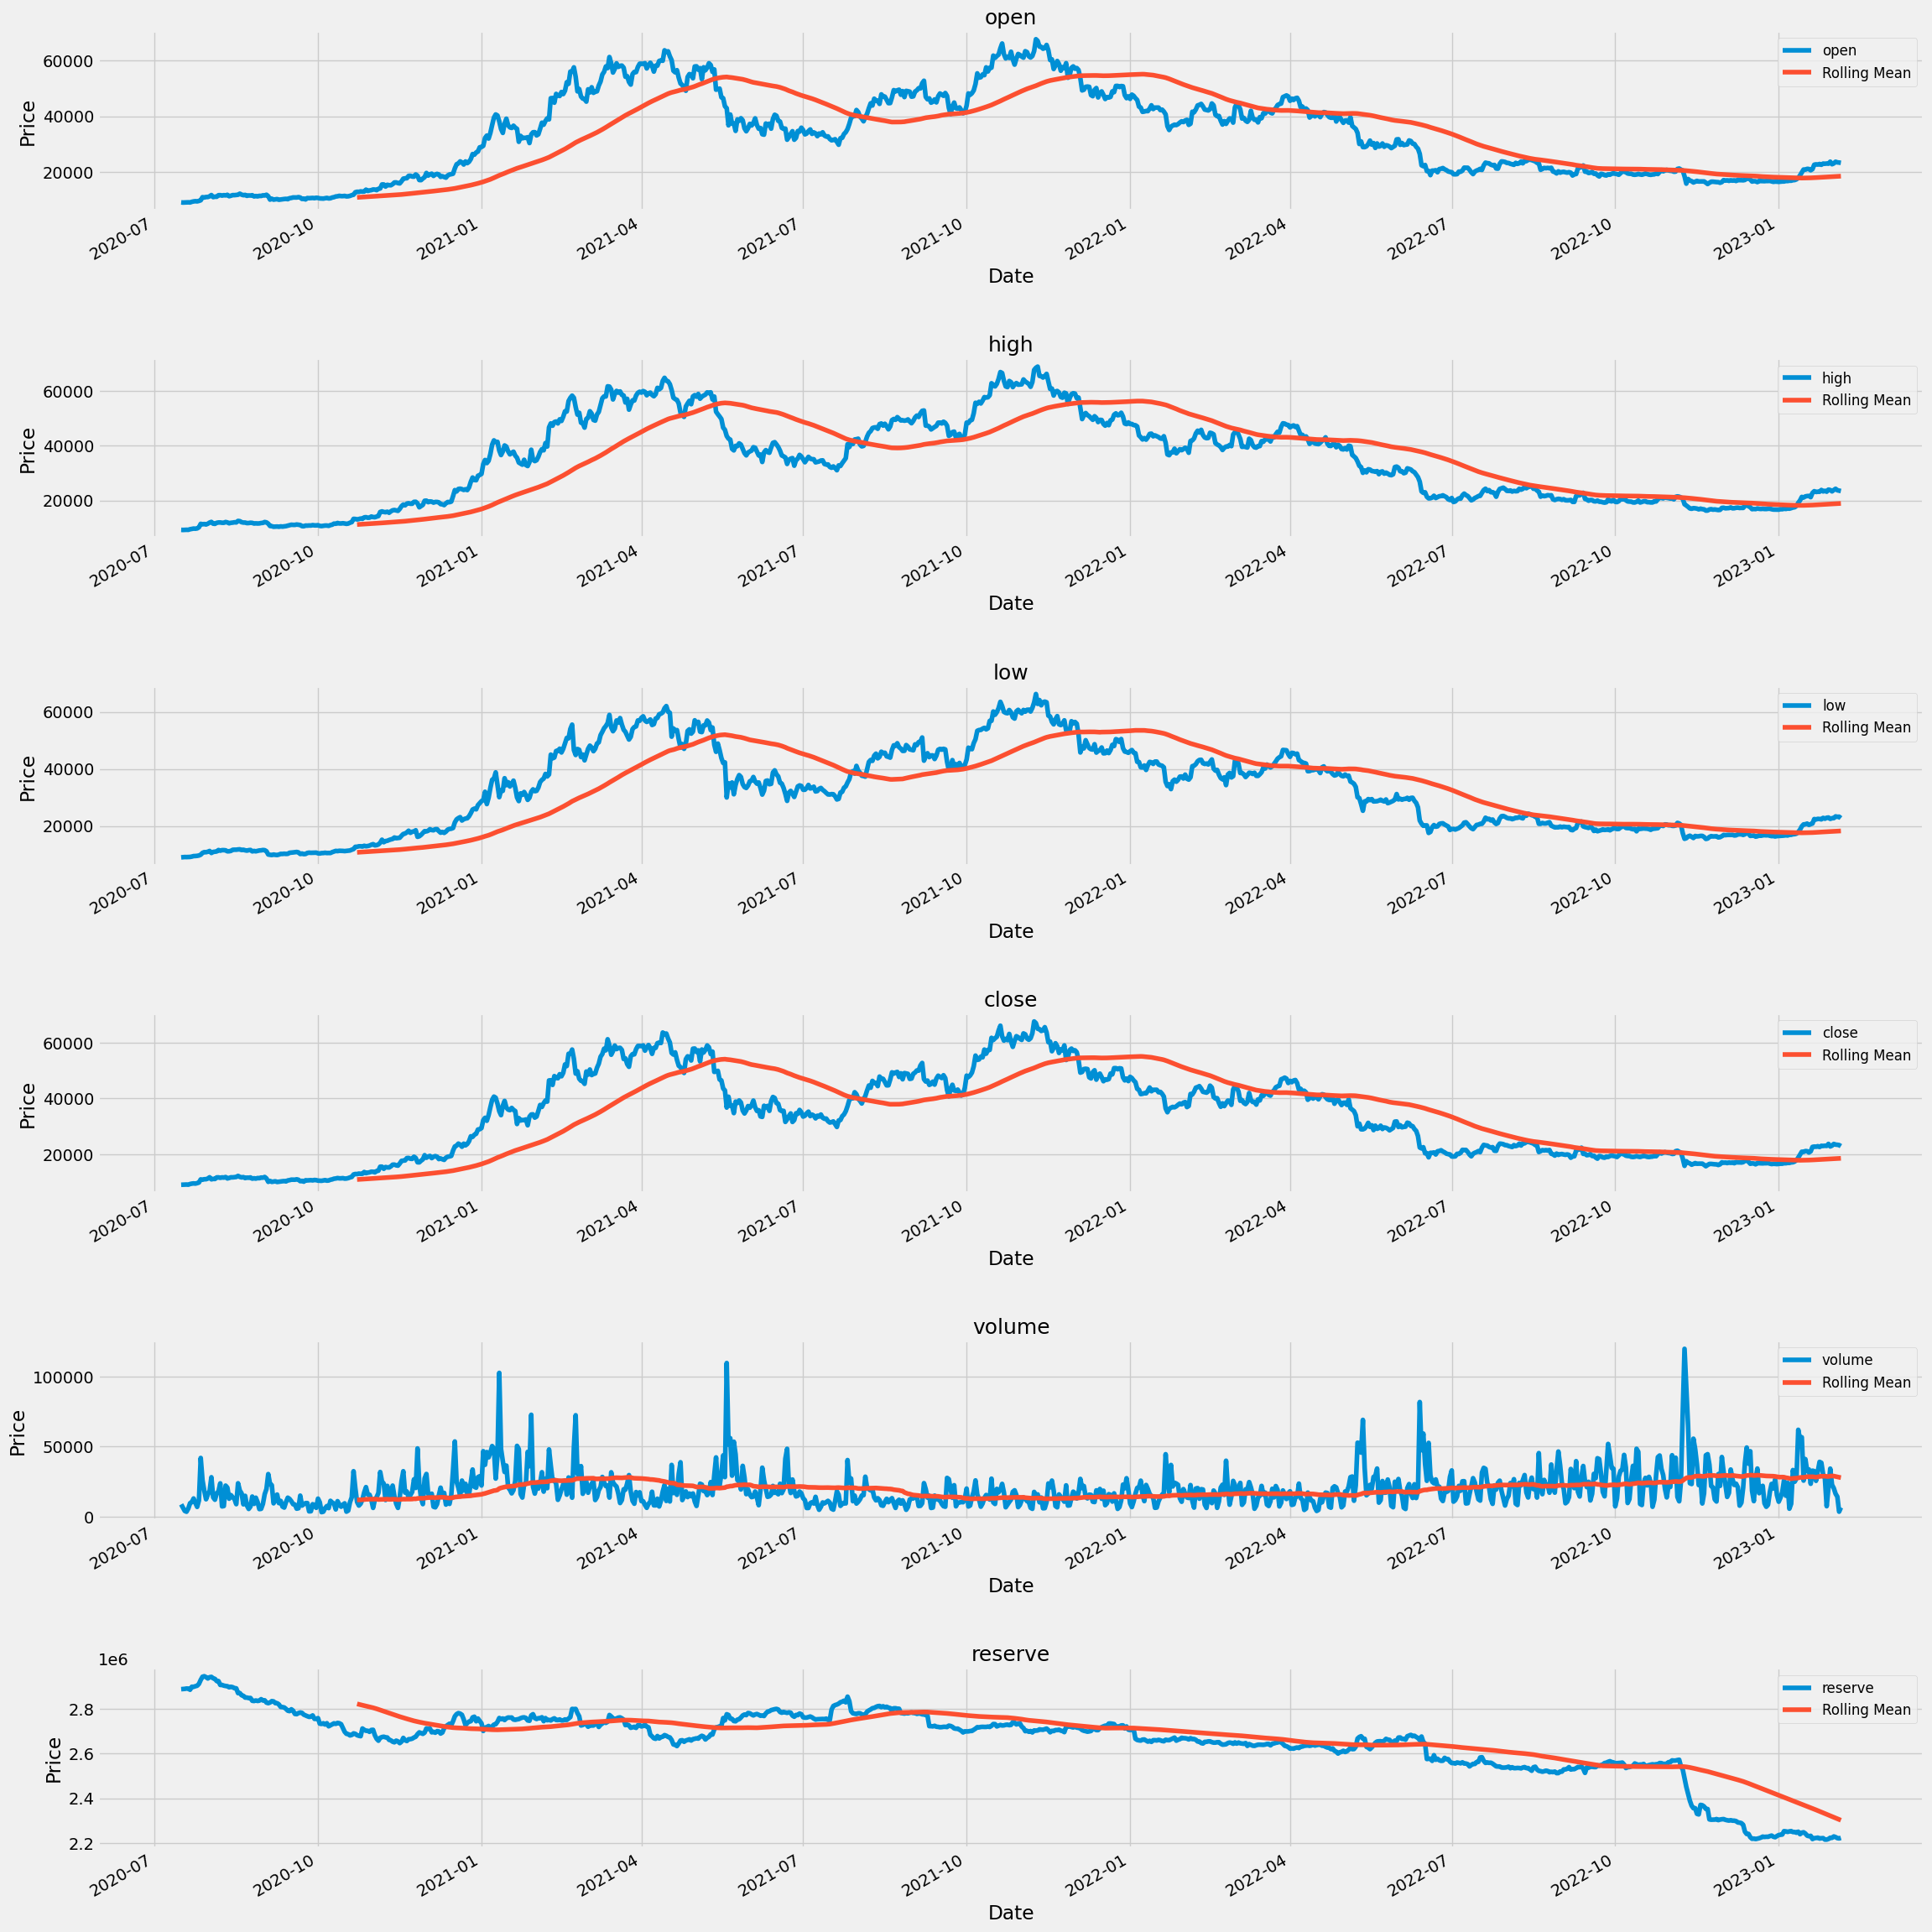

In [14]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))

for i in range(6):
    ax = fig.add_subplot(6, 1, i+1)
    ax.plot(data.iloc[:, i], label=col_names[i])
    data.iloc[:, i].rolling(100).mean().plot(label='Rolling Mean', ax=ax)  # Plot rolling mean on the same axis
    ax.set_title(col_names[i], fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.patch.set_edgecolor('black')
    ax.legend(prop={'size': 12})  # Use ax.legend() to set legend for each subplot

plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

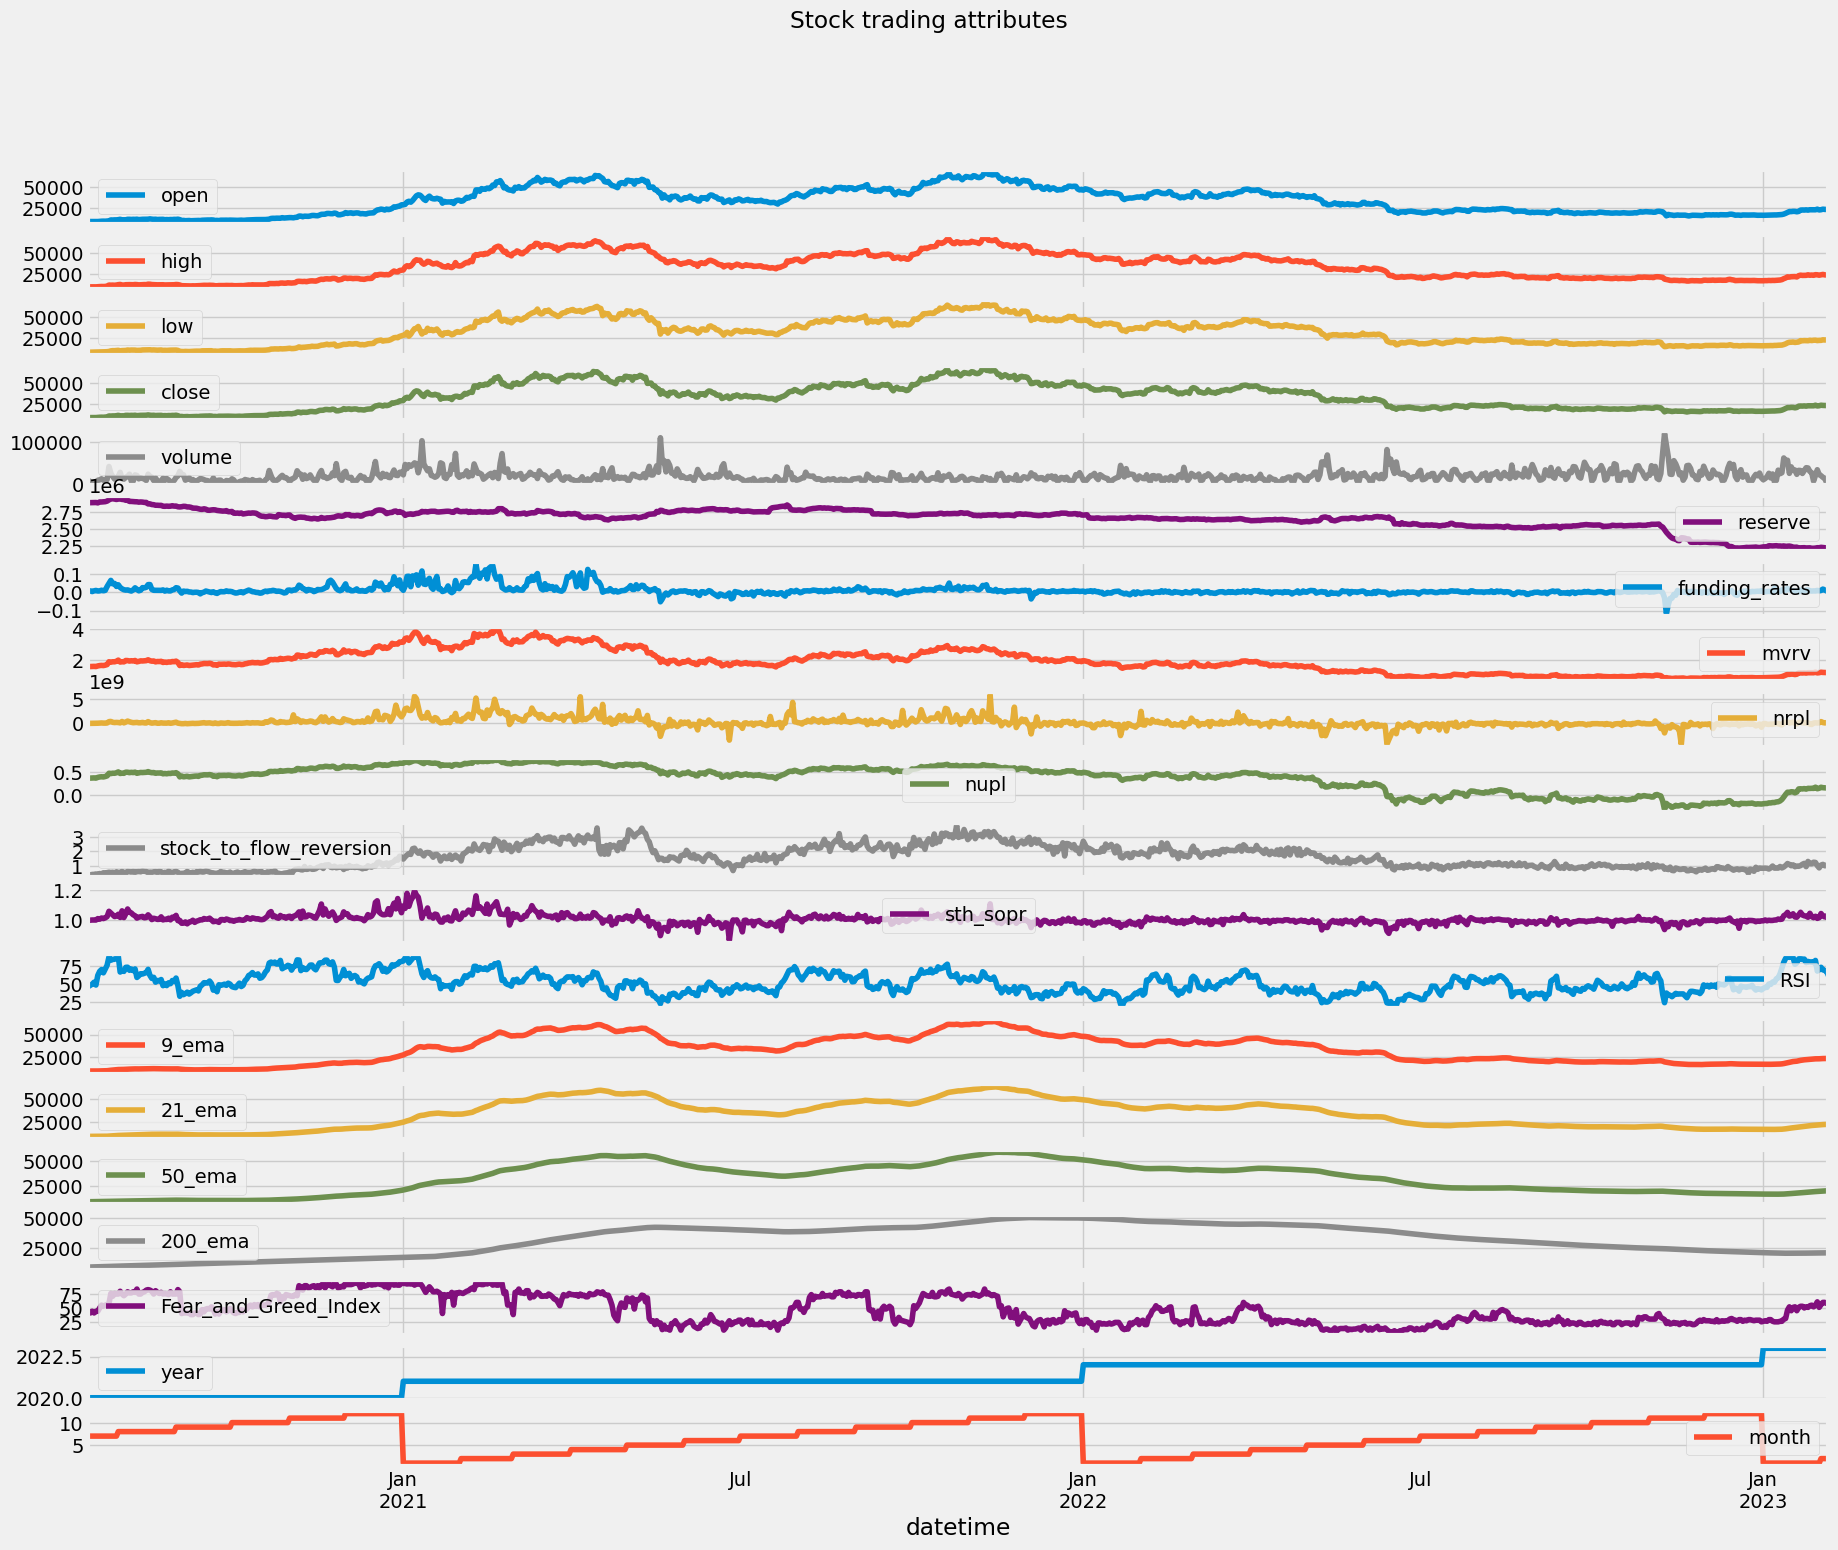

In [15]:
numerical_cols = data.select_dtypes(include=['number']).columns

data.loc['2020':'2023', numerical_cols].plot(subplots=True, figsize=(20,16))
plt.suptitle('Stock trading attributes')
plt.savefig('stocks.png')
plt.show()

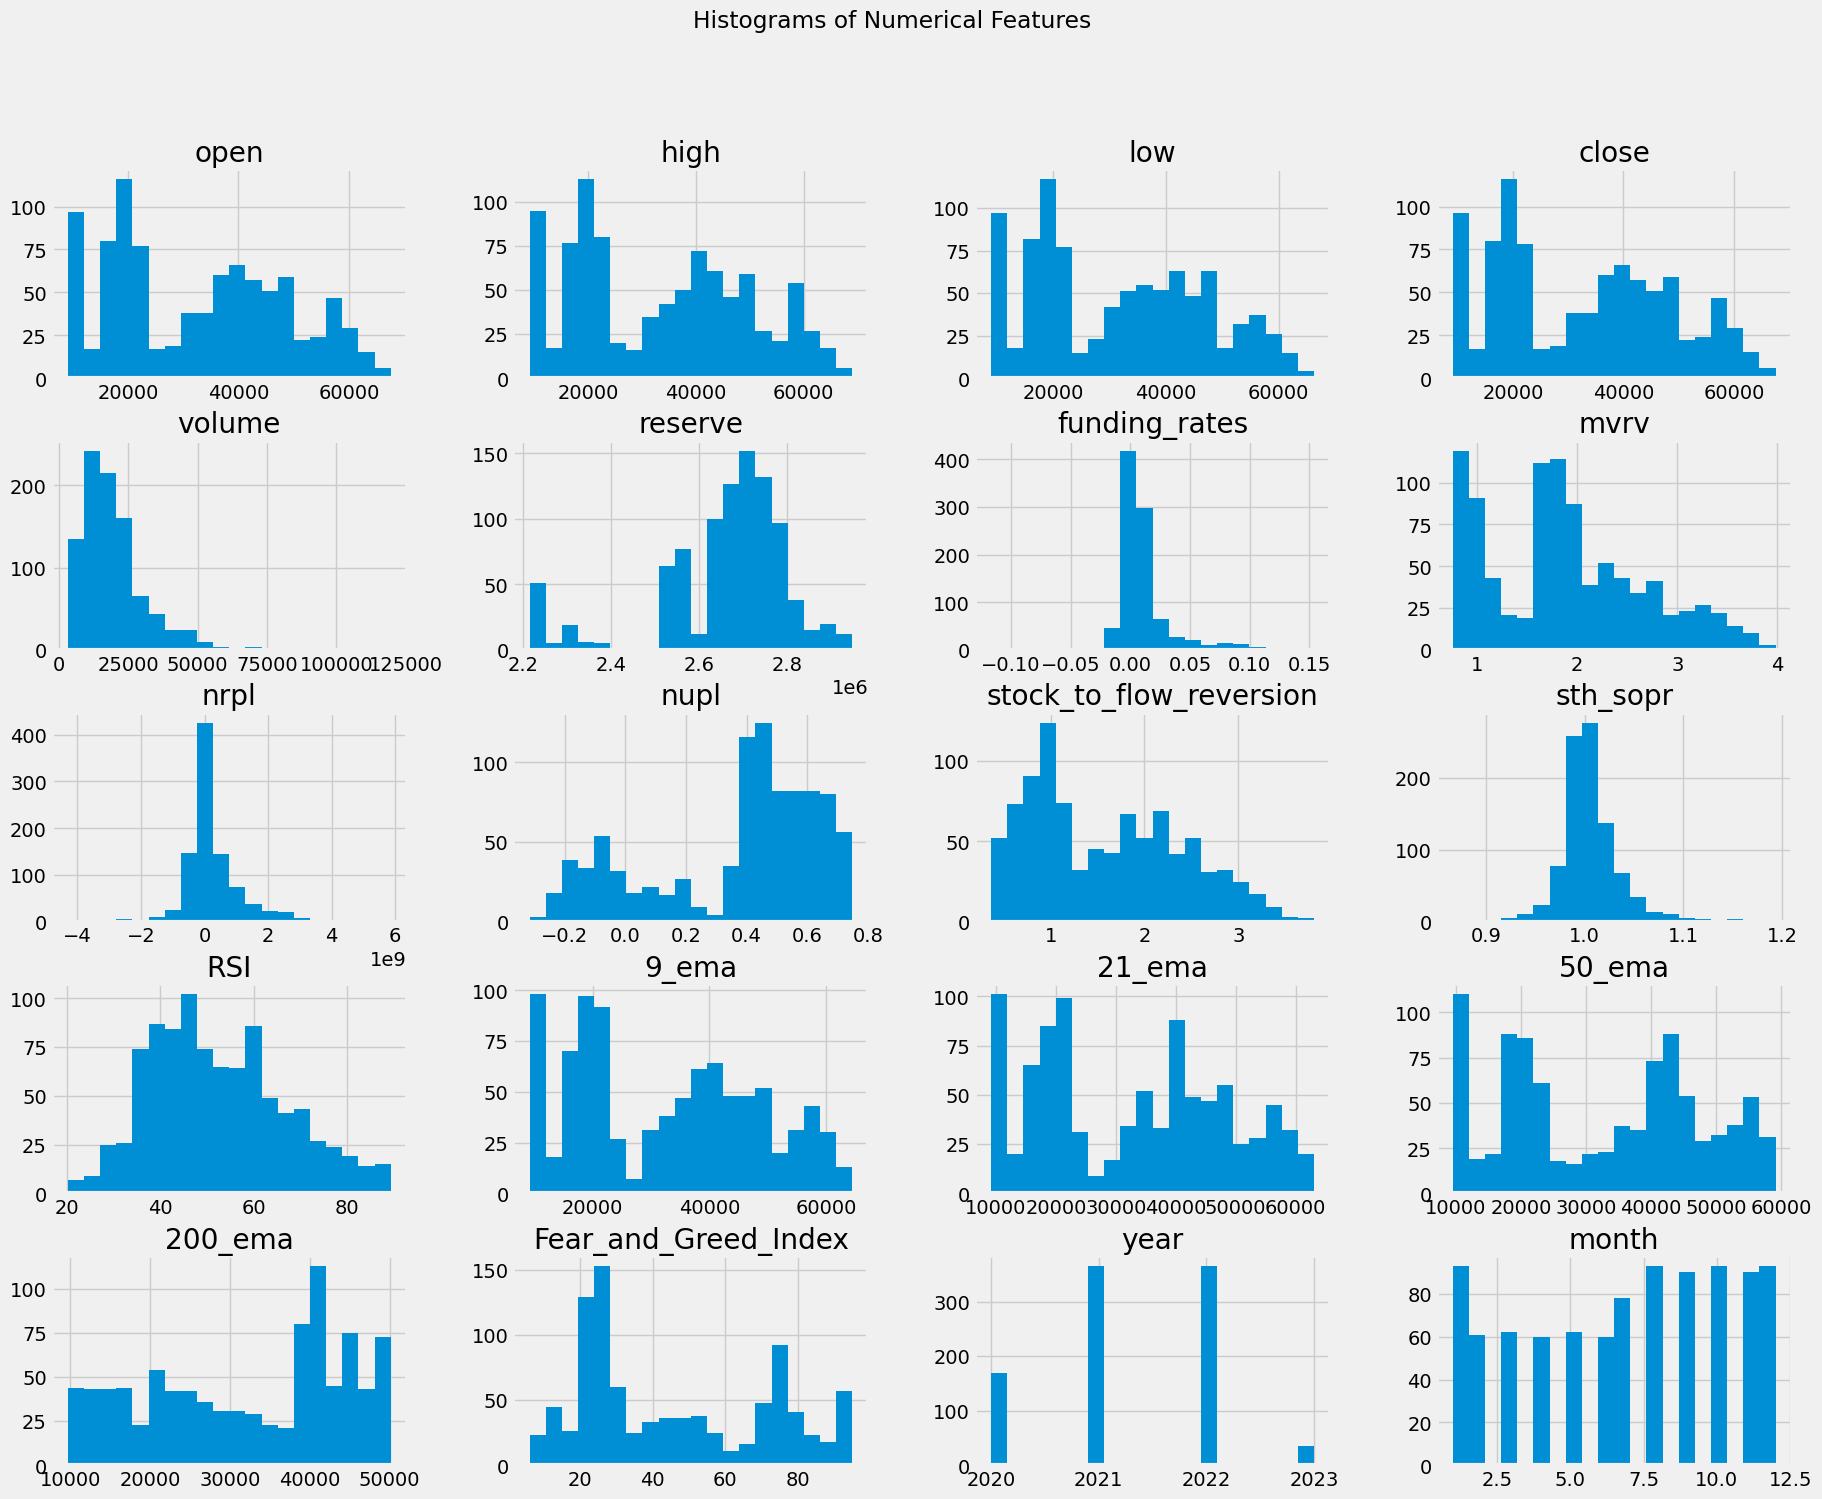

In [16]:
numerical_cols = data.select_dtypes(include=['number']).columns

# Plotting histograms for numerical features
data[numerical_cols].hist(figsize=(20, 16), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

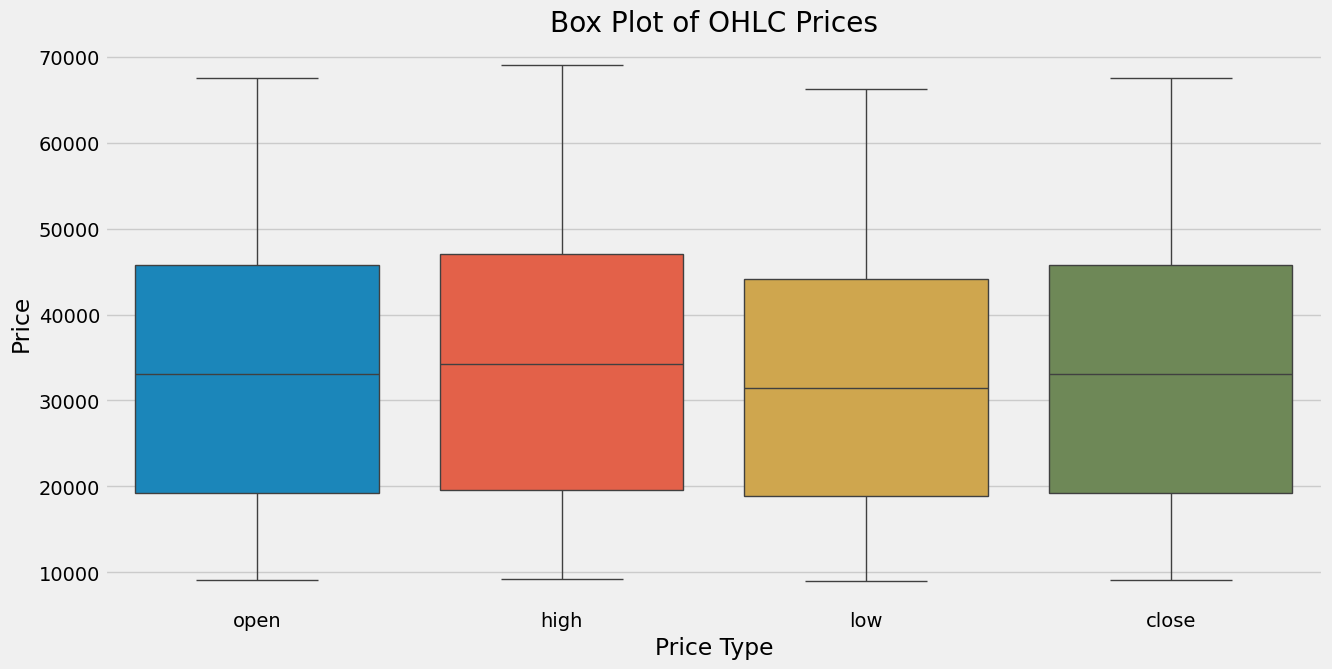

In [17]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data[['open', 'high', 'low', 'close']])
plt.title('Box Plot of OHLC Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

<Figure size 1400x700 with 0 Axes>

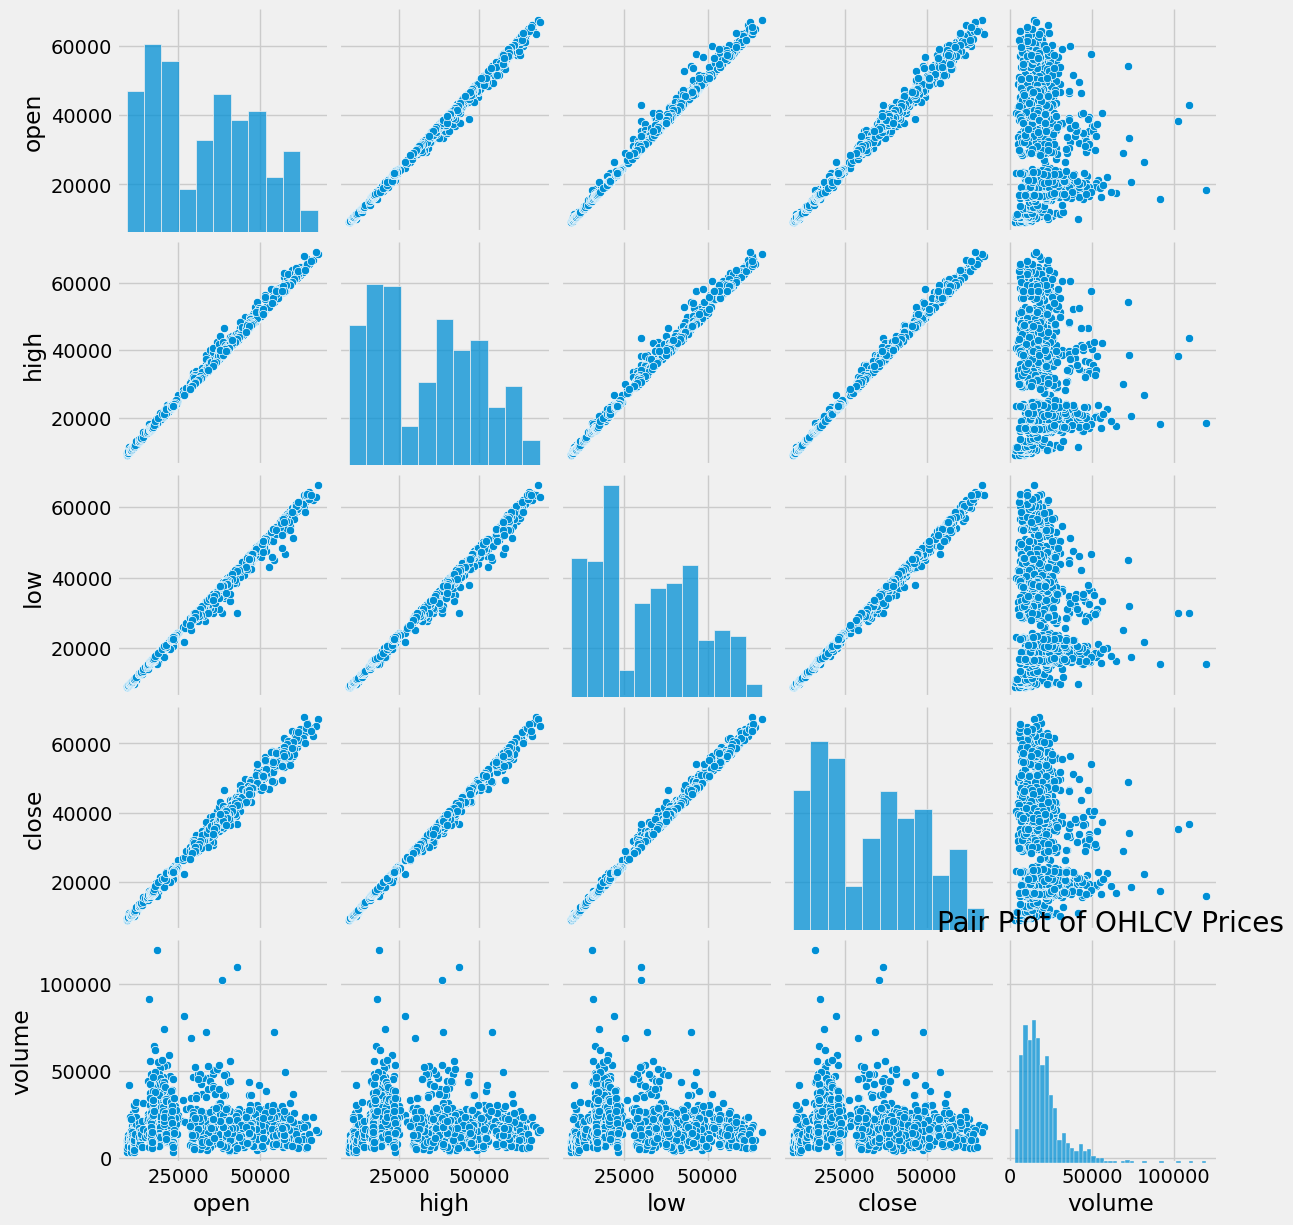

In [18]:
plt.figure(figsize=(14, 7))
sns.pairplot(data=data[['open', 'high', 'low', 'close', 'volume']])
plt.title('Pair Plot of OHLCV Prices')
plt.show()

# Autocorrelation and Partial autocorrelation

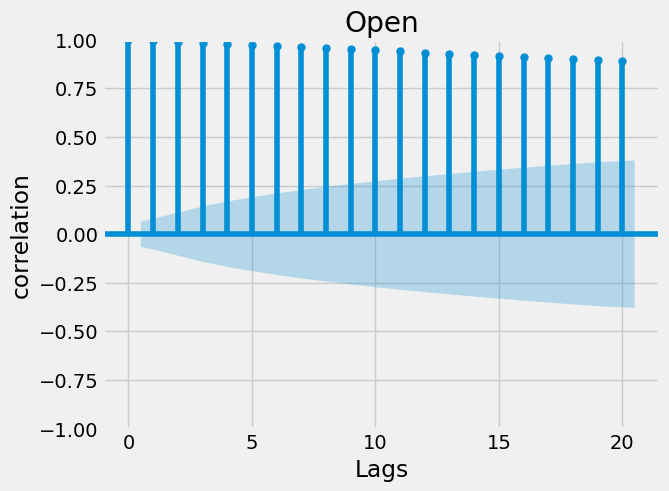

In [19]:
# Autocorrelation of google of high
plot_acf(data["open"],lags=20,title="Open",alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('correlation')
plt.show()

 #### As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

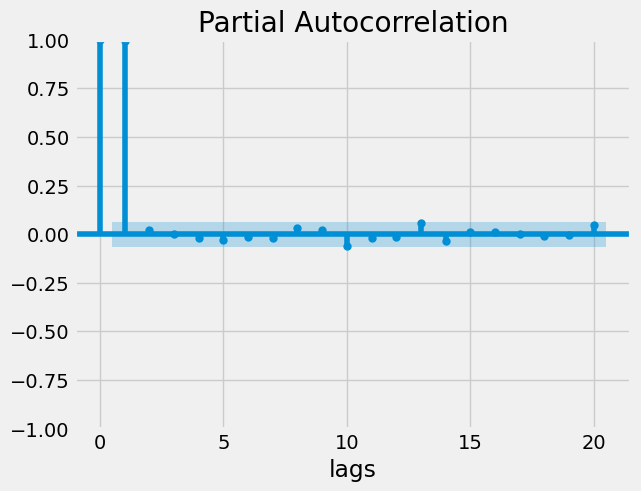

In [20]:
# Partial Autocorrelation of google of High
plot_pacf(data["open"],lags=20)
plt.xlabel('lags')
plt.show()

#### Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

# Trends, Seasonality and Noise

These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series - this will help us to see clear pattern in data
* Seasonality - Clear periodic pattern of a time series(like sine funtion) - can know wthere the change is uniform or not
* Noise - Outliers or missing values - there may be some outliers due to unexpected events in particular time

<Axes: xlabel='datetime'>

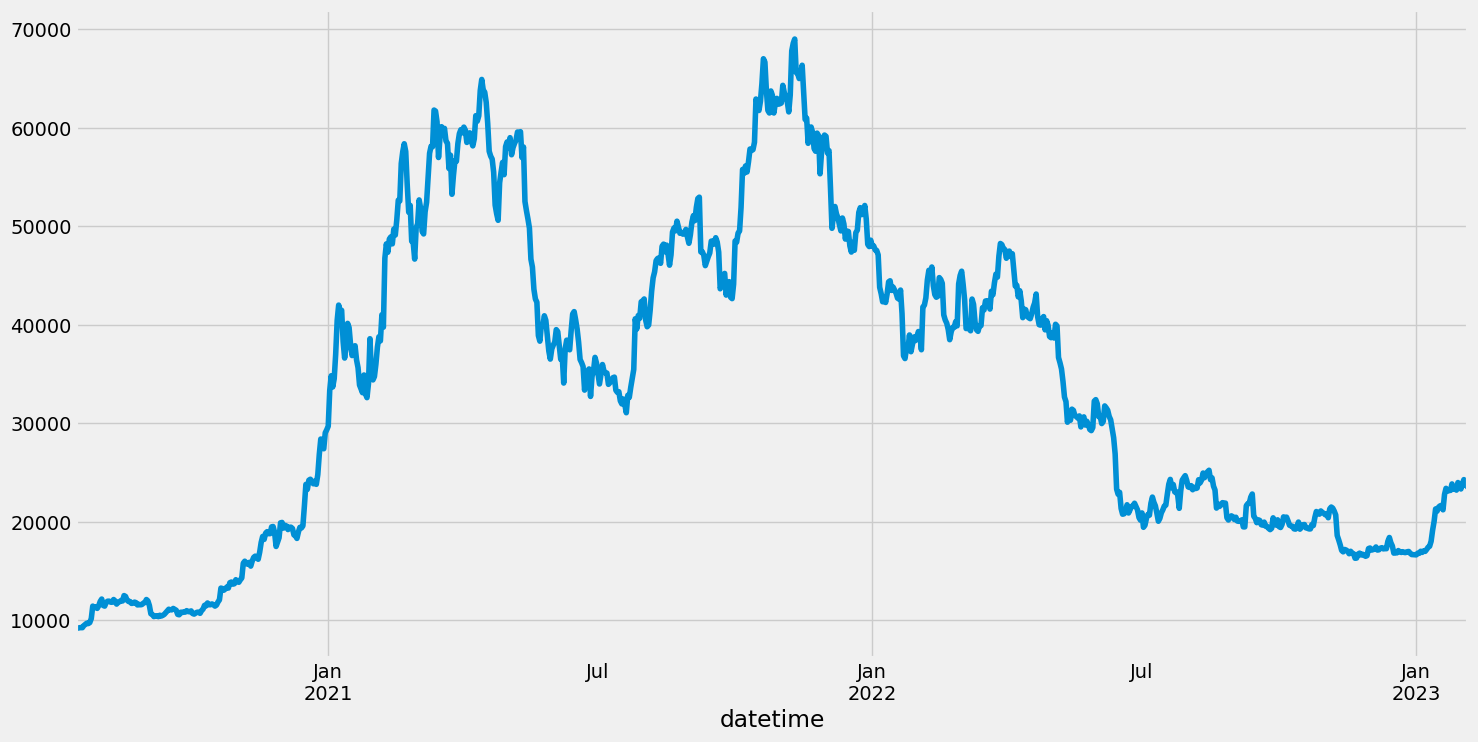

In [21]:
# Let's take Google stocks High for this
data["high"].plot(figsize=(16,8))

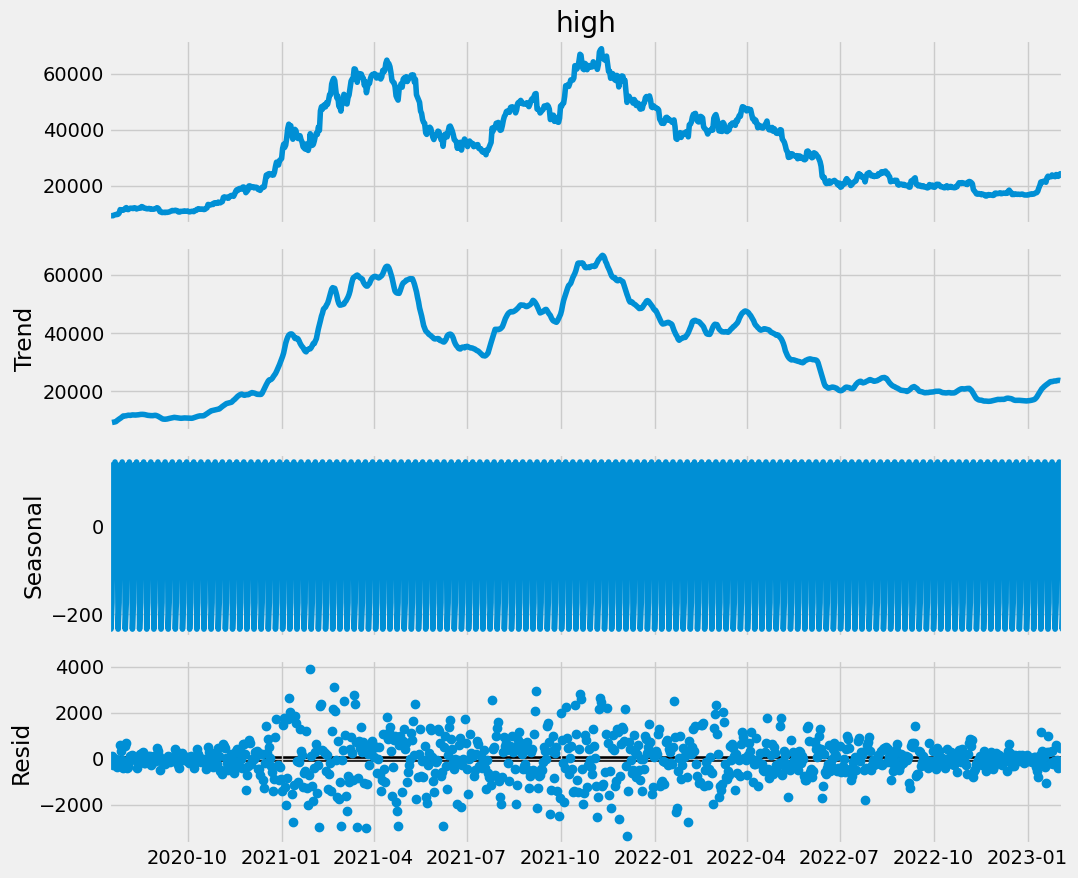

In [22]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9

# Performing seasonal decomposition
decomposed_volume = sm.tsa.seasonal_decompose(data["high"]) 

# Plotting the decomposition
figure = decomposed_volume.plot()
plt.show()

* There is clearly an not properly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values
* when the data has highly varying trend ,it is not stationary

<Figure size 1800x1200 with 0 Axes>

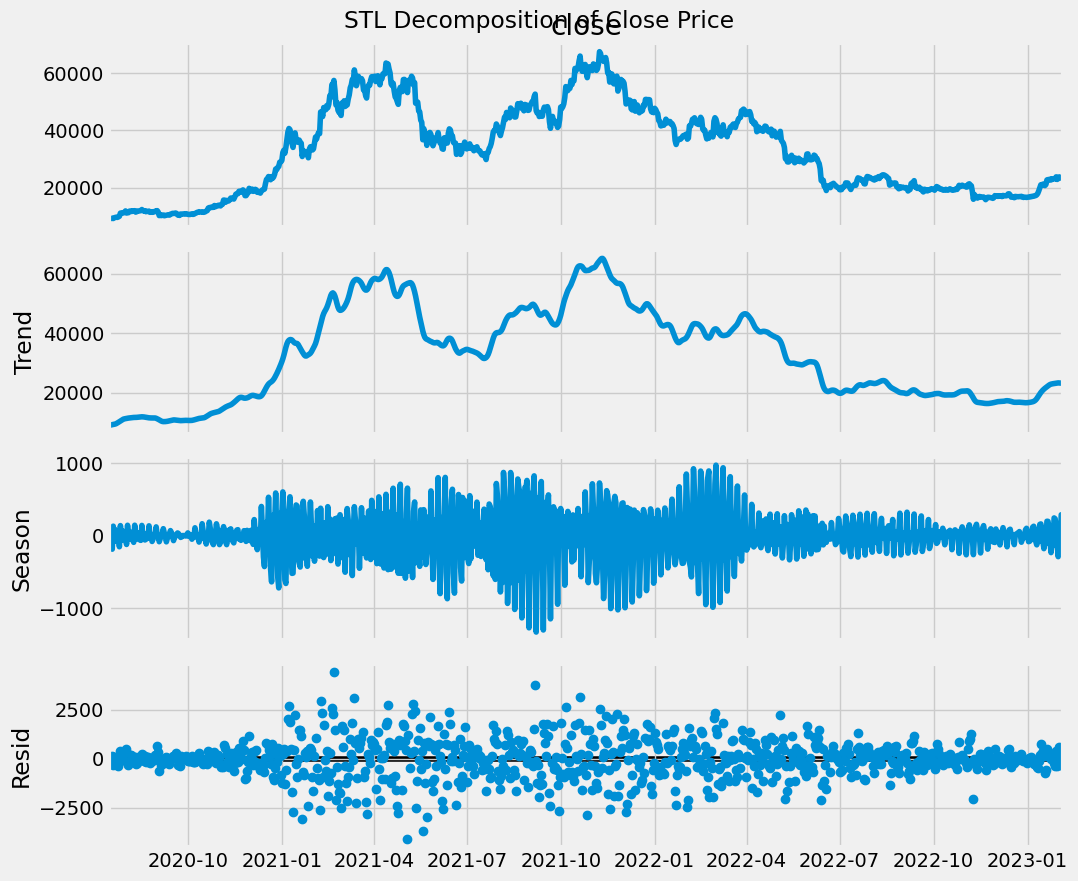

In [23]:
## Checking the seasonality

from statsmodels.tsa.seasonal import STL

stl = STL(data['close'], seasonal=13)
result = stl.fit()

plt.figure(figsize=(18, 12))
result.plot()
plt.suptitle('STL Decomposition of Close Price')
plt.show()

(array([0.0e+00, 5.0e-06, 1.0e-05, 1.5e-05, 2.0e-05, 2.5e-05, 3.0e-05,
        3.5e-05]),
 [Text(0, 0.0, '0.0'),
  Text(0, 4.9999999999999996e-06, '0.5'),
  Text(0, 9.999999999999999e-06, '1.0'),
  Text(0, 1.4999999999999999e-05, '1.5'),
  Text(0, 1.9999999999999998e-05, '2.0'),
  Text(0, 2.4999999999999998e-05, '2.5'),
  Text(0, 2.9999999999999997e-05, '3.0'),
  Text(0, 3.5e-05, '3.5')])

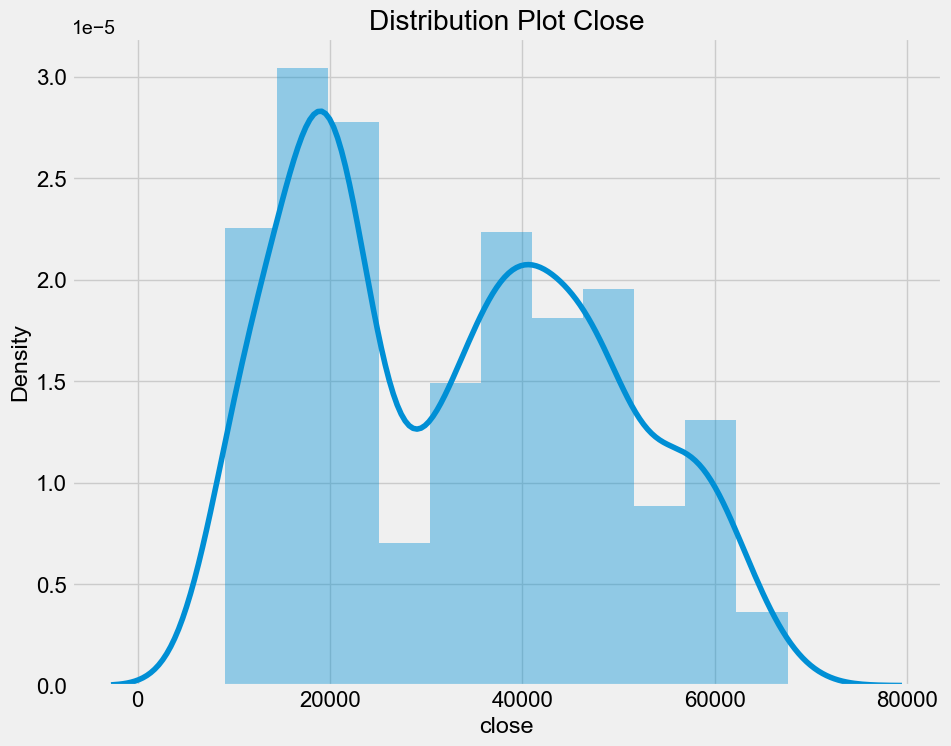

In [24]:
fig = plt.figure(figsize=(10,8))
sns.distplot(data['close']).set_title("Distribution Plot Close")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

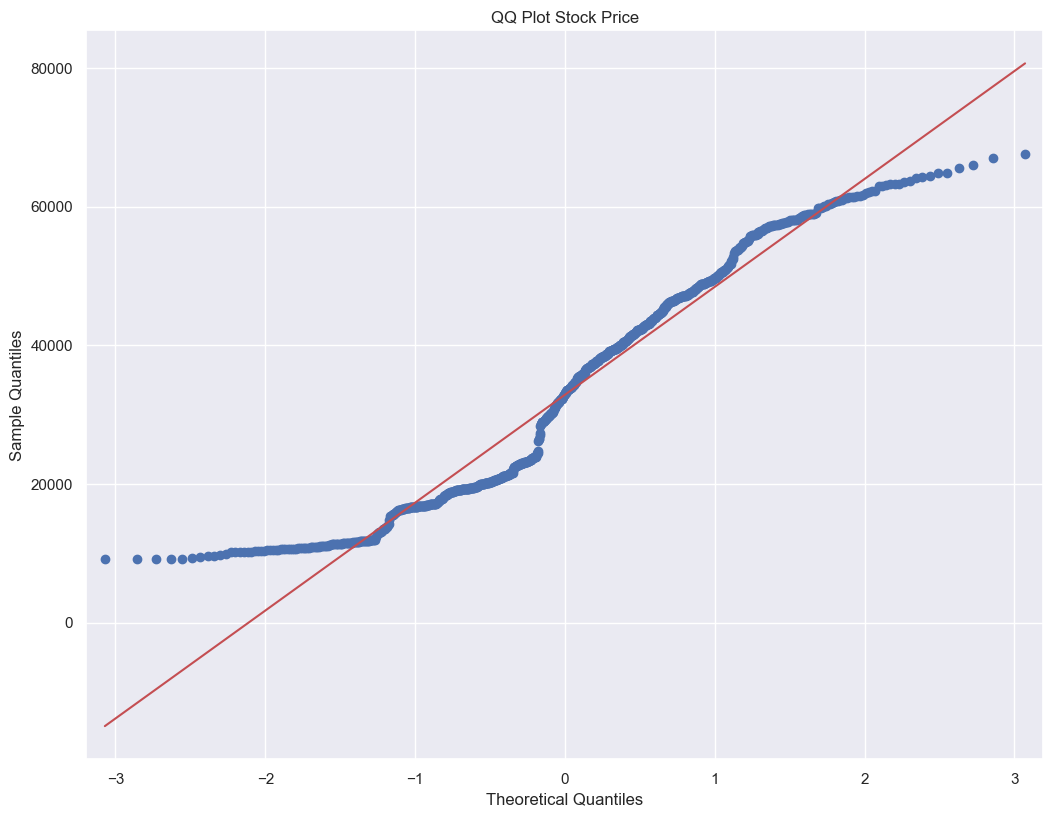

In [25]:
qq_plot = sm.qqplot(data['close'], line='s')
plt.title('QQ Plot Stock Price')
plt.show()

* Heavy Tailed Distribution-Curve at Extremities
* Shows extent of both right and left skews 
* Shows Distribution is Not following Gaussian Normal Distribution

In [26]:
print('Skewness of Distribution is ',data['close'].skew())
print('Kurtosis of Distribution is ',data['close'].kurtosis())

Skewness of Distribution is  0.24738463306933306
Kurtosis of Distribution is  -1.1361505221971706


**Stock Price is Heavily skewed -Right tailed Skewness**

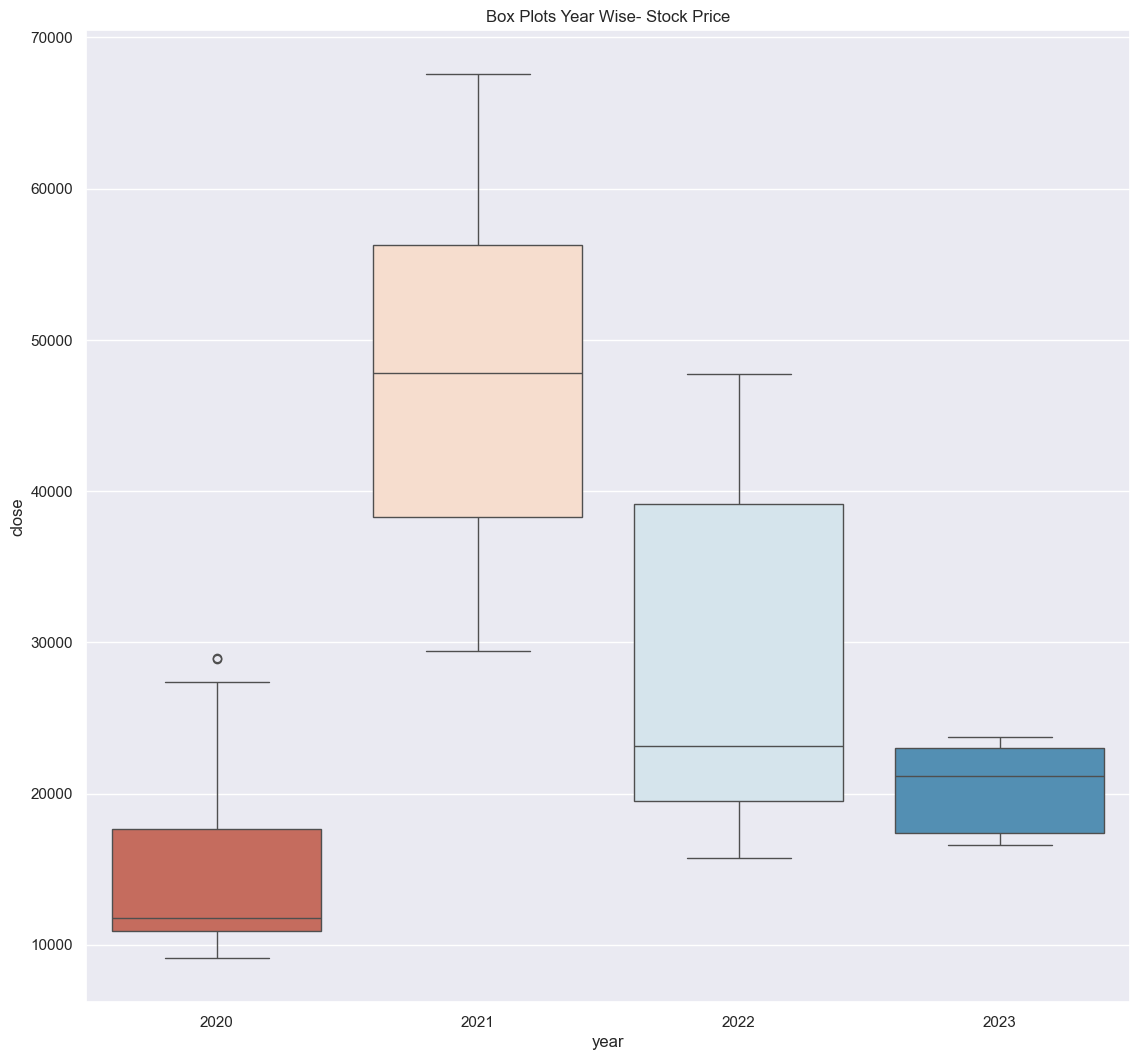

In [27]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=data['year'],y=data['close'],palette='RdBu')
ax.set_title('Box Plots Year Wise- Stock Price')
plt.style.context('fivethirtyeight')

In [28]:
from scipy import stats 

group_by_yr = []
list_years = data['year'].unique()
dict_IQR = {}

for yr in list_years:
    group_by_yr.append('data' + str(yr))

for yr in list_years:
    group_by_yr.append(data[data['year'] == yr]['close'])
    dict_IQR[str(yr)] = stats.iqr(data[data['year'] == yr]['close'])

print(dict_IQR)

{'2020': 6746.27, '2021': 17962.920000000006, '2022': 19597.420000000002, '2023': 5637.970000000001}


Text(0, 0.5, 'InterQuartile Range')

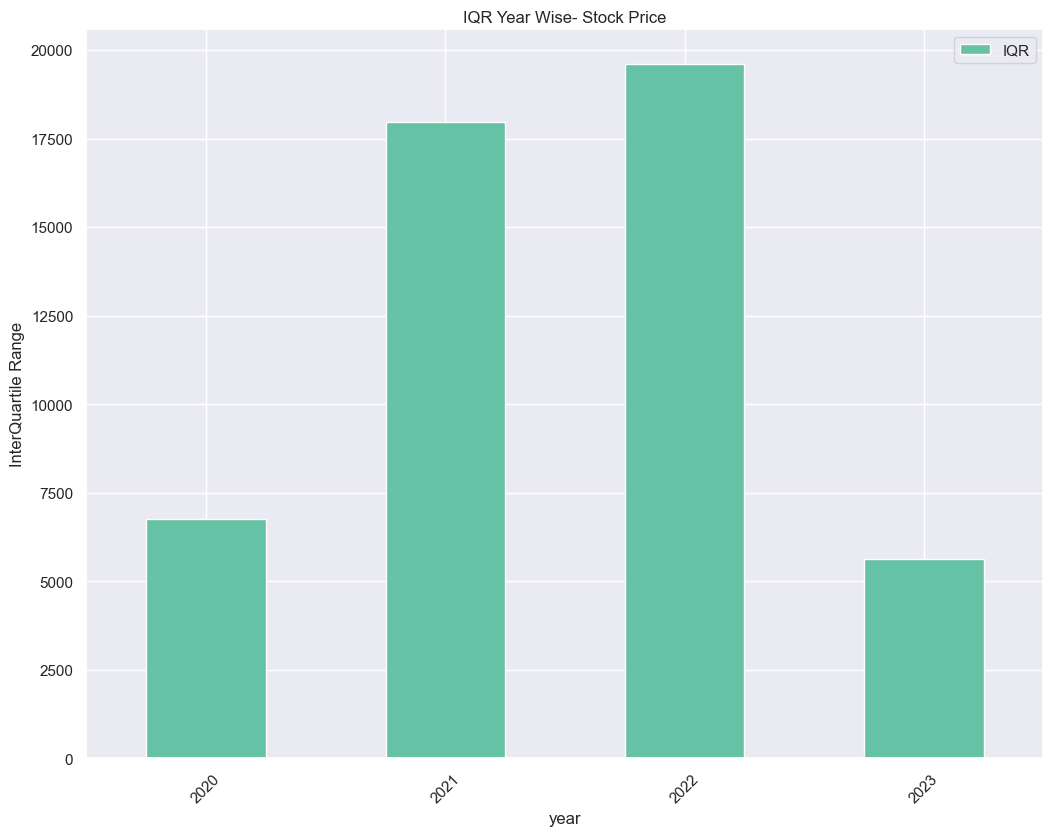

In [29]:
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['year','IQR'])
IQR_df.index = IQR_df['year']
IQR_df.plot(kind='bar',cmap='Set2')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise- Stock Price')
plt.ylabel('InterQuartile Range')

#### 2021 and 2022 are the most volatile years of the stock price

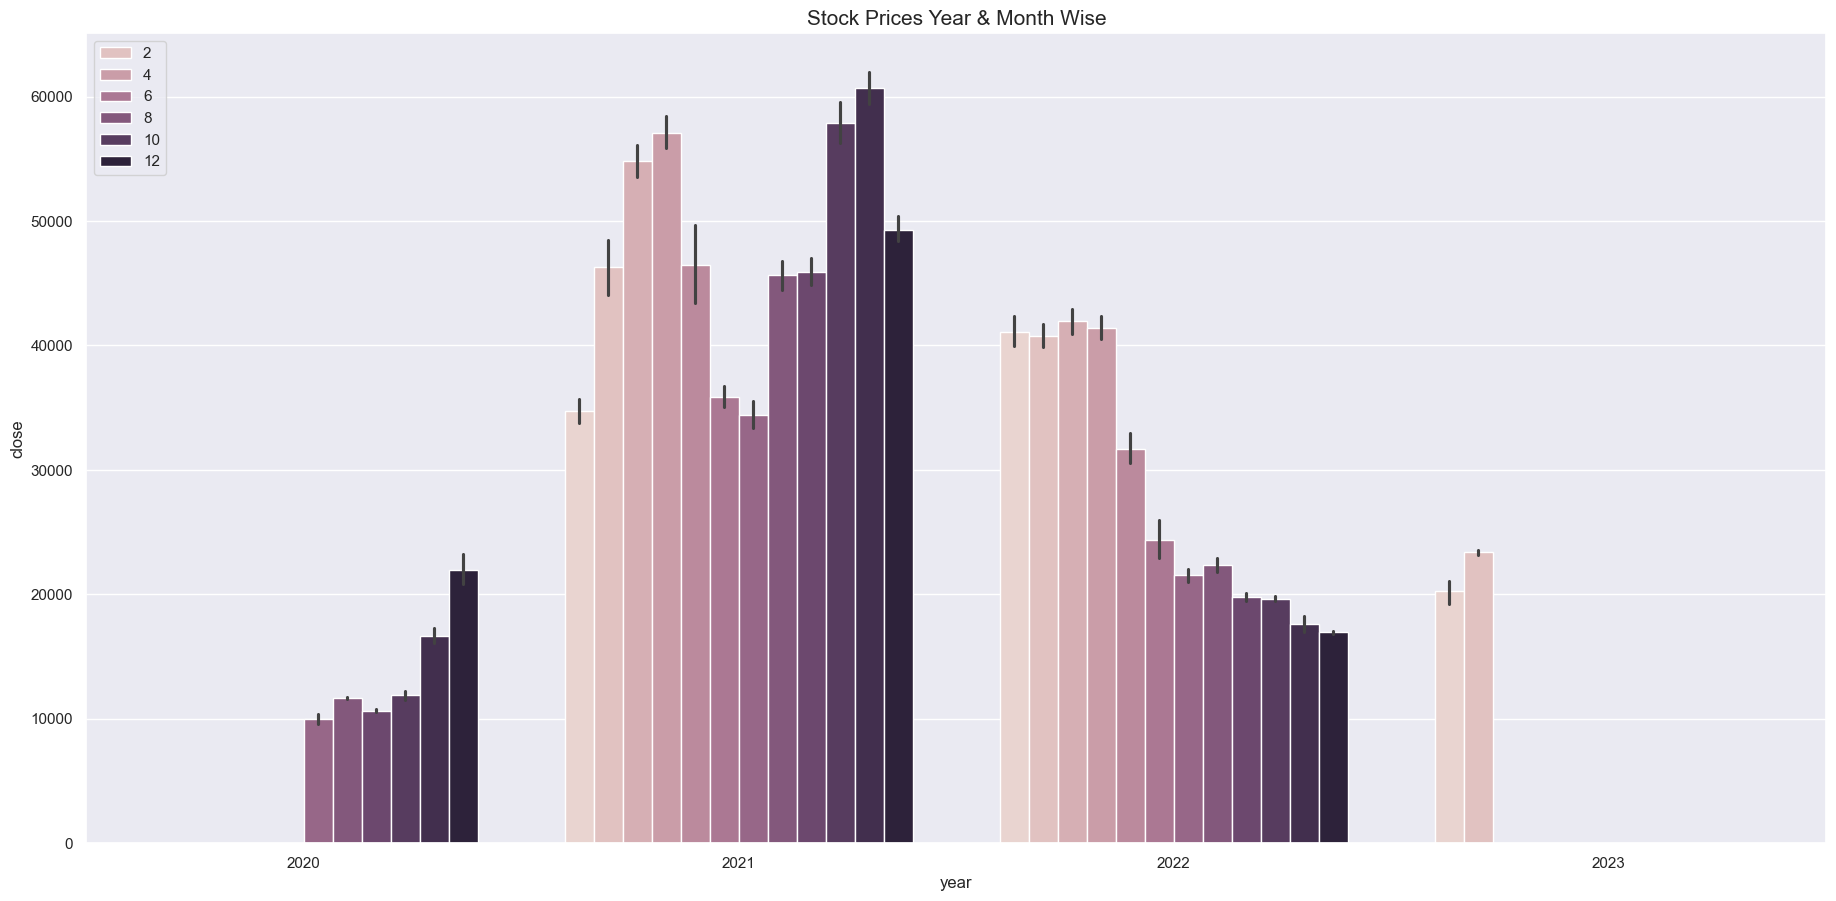

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("rocket", 4)
a = sns.barplot(x="year", y="close", hue = 'month',data=data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

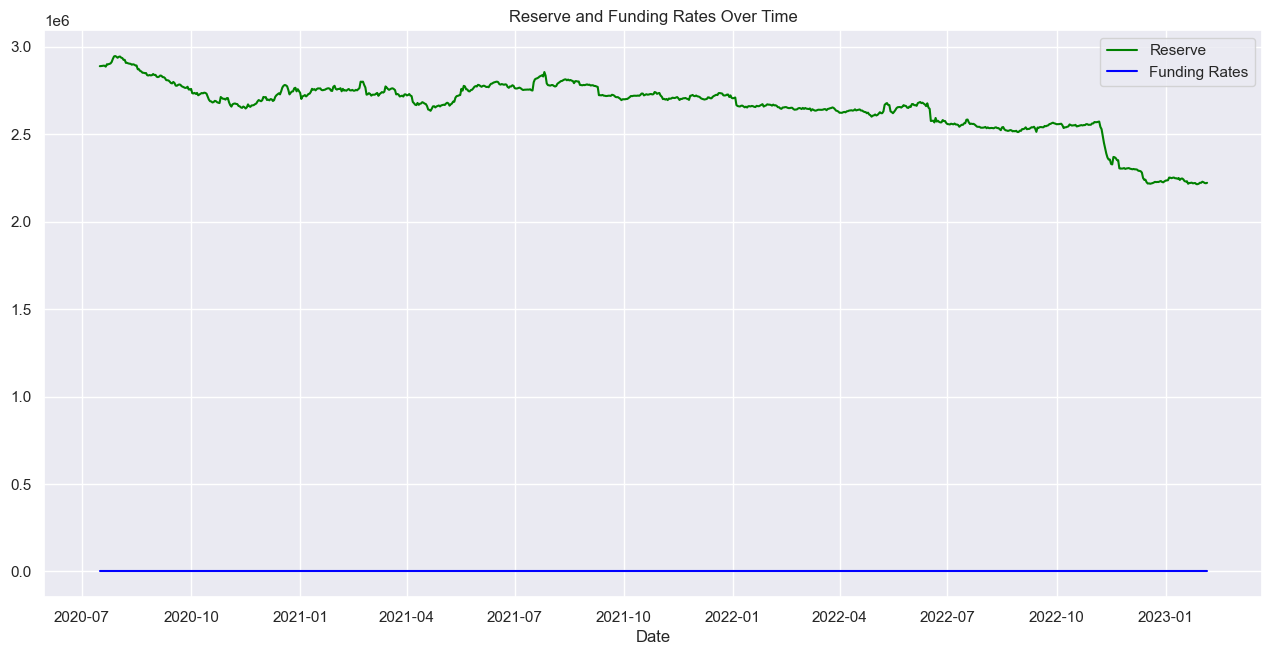

In [31]:
# Time series plot of reserve and funding rates
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], data['reserve'], label='Reserve', color='green')
plt.plot(data['datetime'], data['funding_rates'], label='Funding Rates', color='blue')
plt.xlabel('Date')
plt.title('Reserve and Funding Rates Over Time')
plt.legend()
plt.show()

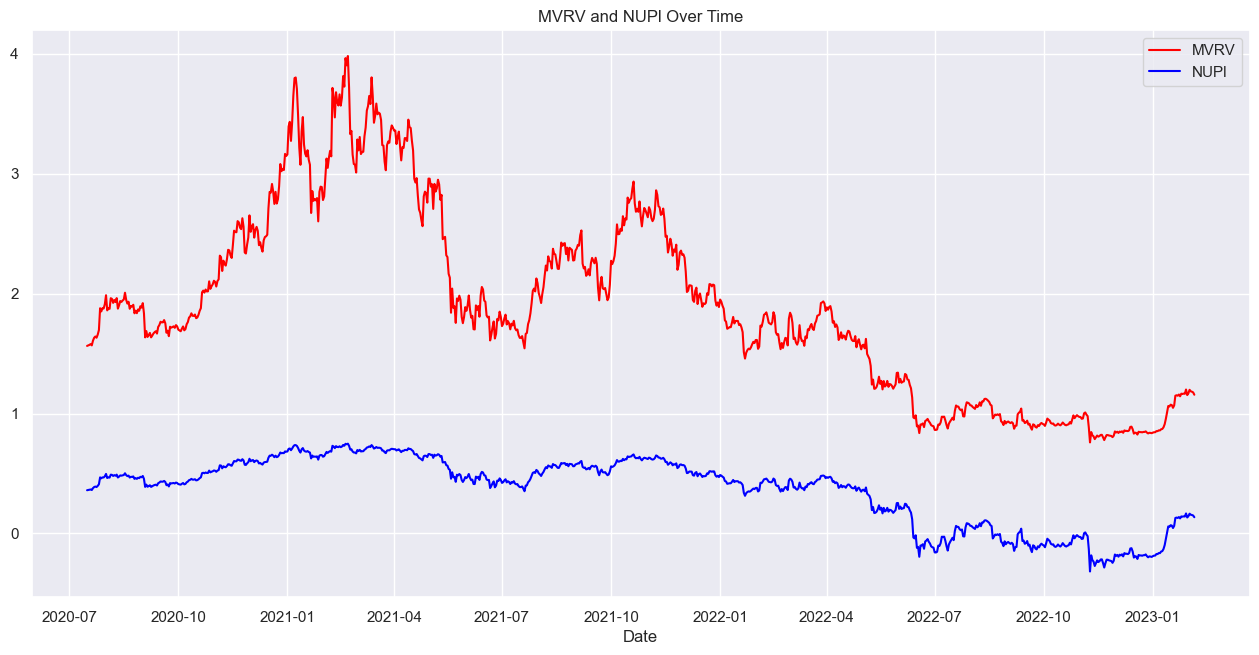

In [32]:
# Time series plot of MVRV and NUPl
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], data['mvrv'], label='MVRV', color='red')
plt.plot(data['datetime'], data['nupl'], label='NUPl', color='blue')
plt.xlabel('Date')
plt.title('MVRV and NUPl Over Time')
plt.legend()
plt.show()

**Moving averages**

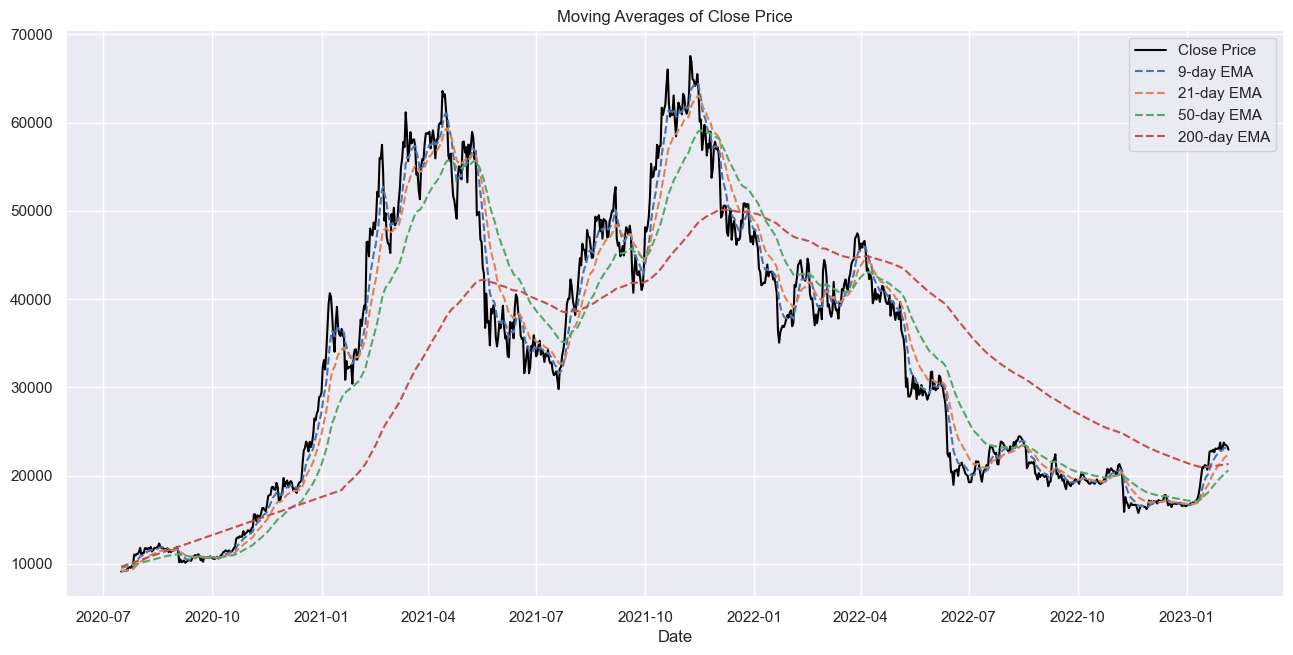

In [33]:
# Plotting moving averages of close price
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], data['close'], label='Close Price', color='black')
plt.plot(data['datetime'], data['9_ema'], label='9-day EMA', linestyle='--')
plt.plot(data['datetime'], data['21_ema'], label='21-day EMA', linestyle='--')
plt.plot(data['datetime'], data['50_ema'], label='50-day EMA', linestyle='--')
plt.plot(data['datetime'], data['200_ema'], label='200-day EMA', linestyle='--')
plt.xlabel('Date')
plt.title('Moving Averages of Close Price')
plt.legend()
plt.show()

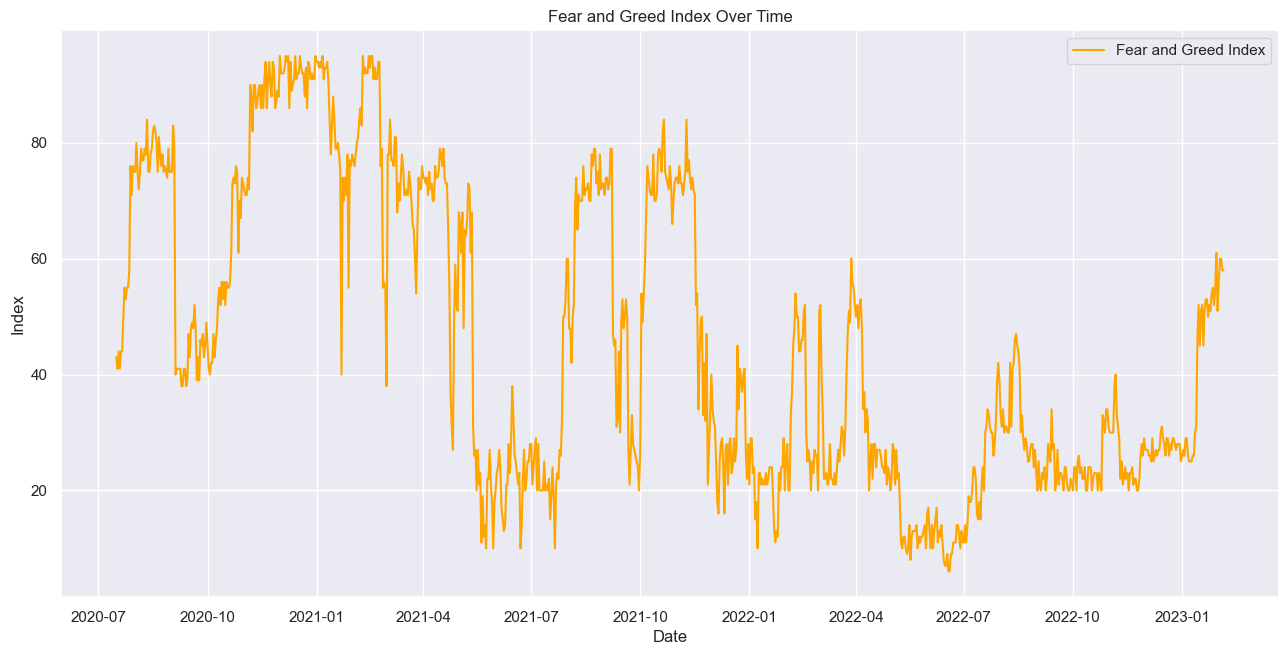

In [34]:
# Time series plot of Fear and Greed Index
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], data['Fear_and_Greed_Index'], label='Fear and Greed Index', color='orange')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Fear and Greed Index Over Time')
plt.legend()
plt.show()

# Rolling Statistics

In [35]:
rolling_window = 30  # Choose an appropriate window size for rolling statistics

# Compute rolling mean and standard deviation
rolling_mean = data['close'].rolling(window=rolling_window).mean()
rolling_std = data['close'].rolling(window=rolling_window).std()

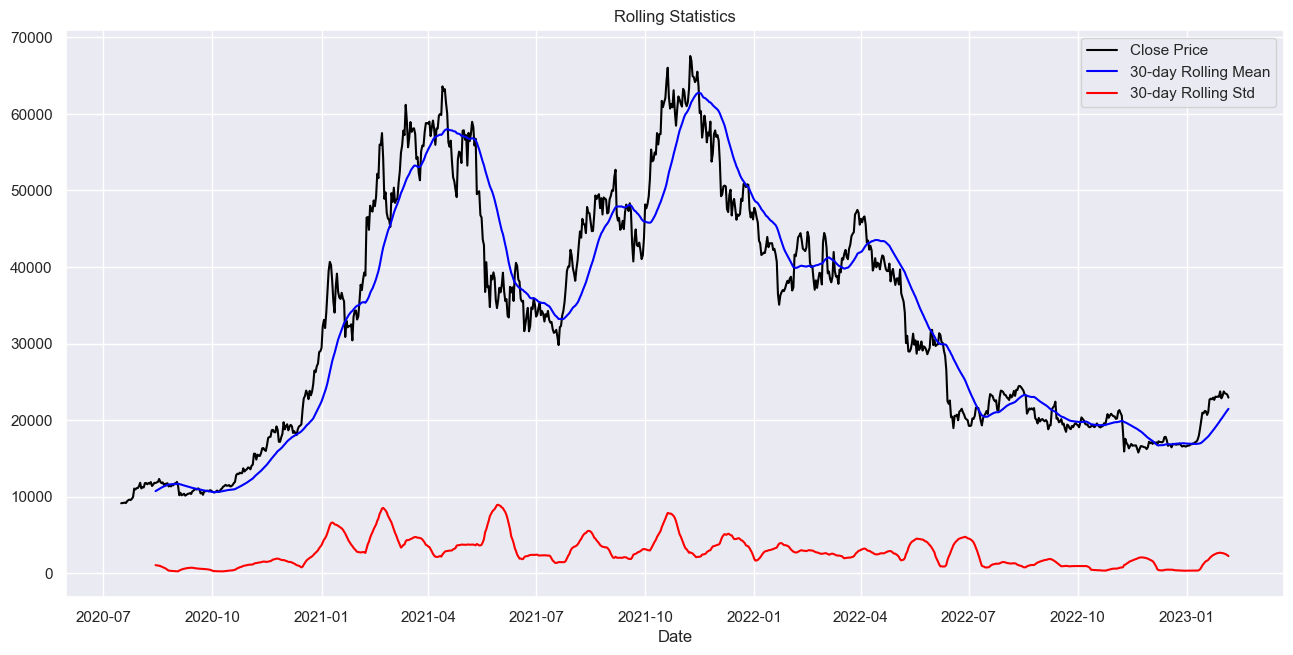

In [36]:
# Plot rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], data['close'], label='Close Price', color='black')
plt.plot(data['datetime'], rolling_mean, label=f'{rolling_window}-day Rolling Mean', color='blue')
plt.plot(data['datetime'], rolling_std, label=f'{rolling_window}-day Rolling Std', color='red')
plt.xlabel('Date')
plt.title('Rolling Statistics')
plt.legend()
plt.show()

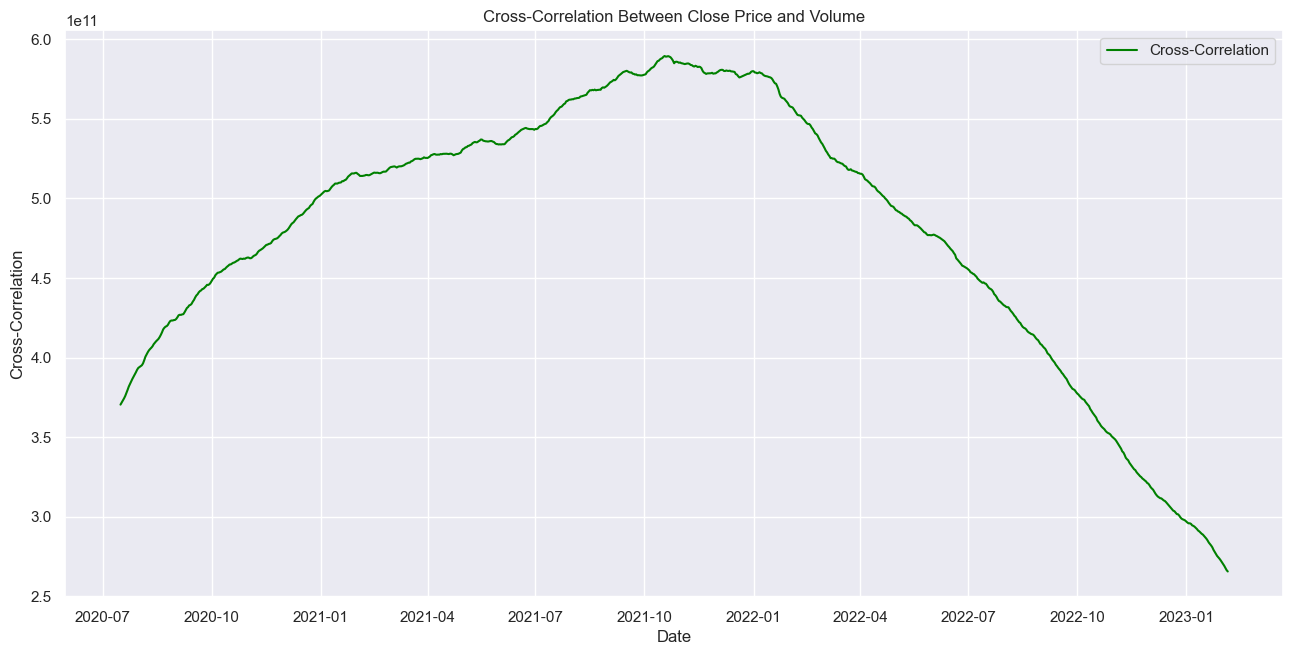

In [37]:
# Compute cross-correlation
cross_corr = np.correlate(data['close'], data['volume'], mode='same')

# Plot cross-correlation
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], cross_corr, label='Cross-Correlation', color='green')
plt.xlabel('Date')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Close Price and Volume')
plt.legend()
plt.show()

In [38]:
volume_price_corr = data['volume'].corr(data['close'])
print(f"Correlation between Volume and Close Price: {volume_price_corr}")

Correlation between Volume and Close Price: -0.12379593017362377


# Time Series Forecasting using LSTMs

In [39]:
from tensorflow.keras.optimizers import Adam

In [40]:
# Extract the 'close' price column
close_price = data['close'].values.reshape(-1, 1)

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
close_price_scaled = scaler.fit_transform(close_price)

In [42]:
# Split the data into training and testing sets
train_size = int(len(close_price_scaled) * 0.8)
test_size = len(close_price_scaled) - train_size
train_data, test_data = close_price_scaled[0:train_size,:], close_price_scaled[train_size:len(close_price_scaled),:]

In [43]:
# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  # Number of time steps to look back
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [44]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [45]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [46]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100

24/24 - 5s - loss: 0.0851 - val_loss: 0.0015 - 5s/epoch - 194ms/step
Epoch 2/100
24/24 - 0s - loss: 0.0060 - val_loss: 0.0039 - 134ms/epoch - 6ms/step
Epoch 3/100
24/24 - 0s - loss: 0.0039 - val_loss: 0.0017 - 149ms/epoch - 6ms/step
Epoch 4/100
24/24 - 0s - loss: 0.0035 - val_loss: 0.0017 - 149ms/epoch - 6ms/step
Epoch 5/100
24/24 - 0s - loss: 0.0033 - val_loss: 0.0012 - 135ms/epoch - 6ms/step
Epoch 6/100
24/24 - 0s - loss: 0.0031 - val_loss: 9.9979e-04 - 145ms/epoch - 6ms/step
Epoch 7/100
24/24 - 0s - loss: 0.0029 - val_loss: 7.4425e-04 - 230ms/epoch - 10ms/step
Epoch 8/100
24/24 - 0s - loss: 0.0029 - val_loss: 6.1491e-04 - 129ms/epoch - 5ms/step
Epoch 9/100
24/24 - 0s - loss: 0.0028 - val_loss: 5.2850e-04 - 128ms/epoch - 5ms/step
Epoch 10/100
24/24 - 0s - loss: 0.0028 - val_loss: 5.4217e-04 - 127ms/epoch - 5ms/step
Epoch 11/100
24/24 - 0s - loss: 0.0027 - val_loss: 4.2696e-04 - 127ms/epoch - 5ms/step
Epoch 12/100
24/24 - 0s - loss: 0.0026 - val_loss: 4.0489e-04 - 139ms/e

In [47]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


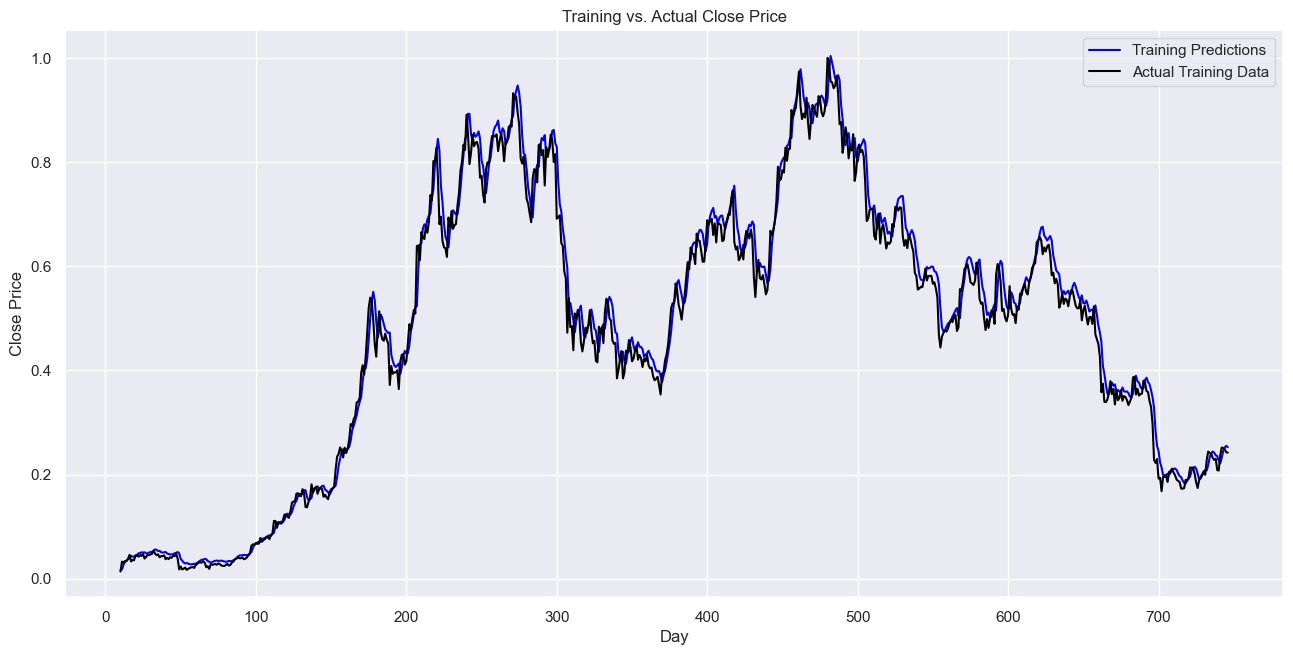

In [48]:
# Plot training vs. actual
plt.figure(figsize=(14, 7))
plt.plot(np.arange(look_back, len(train_predict) + look_back), train_predict.ravel(), label='Training Predictions', color='blue')
plt.plot(np.arange(look_back, len(train_predict) + look_back), Y_train.ravel(), label='Actual Training Data', color='black')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Training vs. Actual Close Price')
plt.legend()
plt.show()

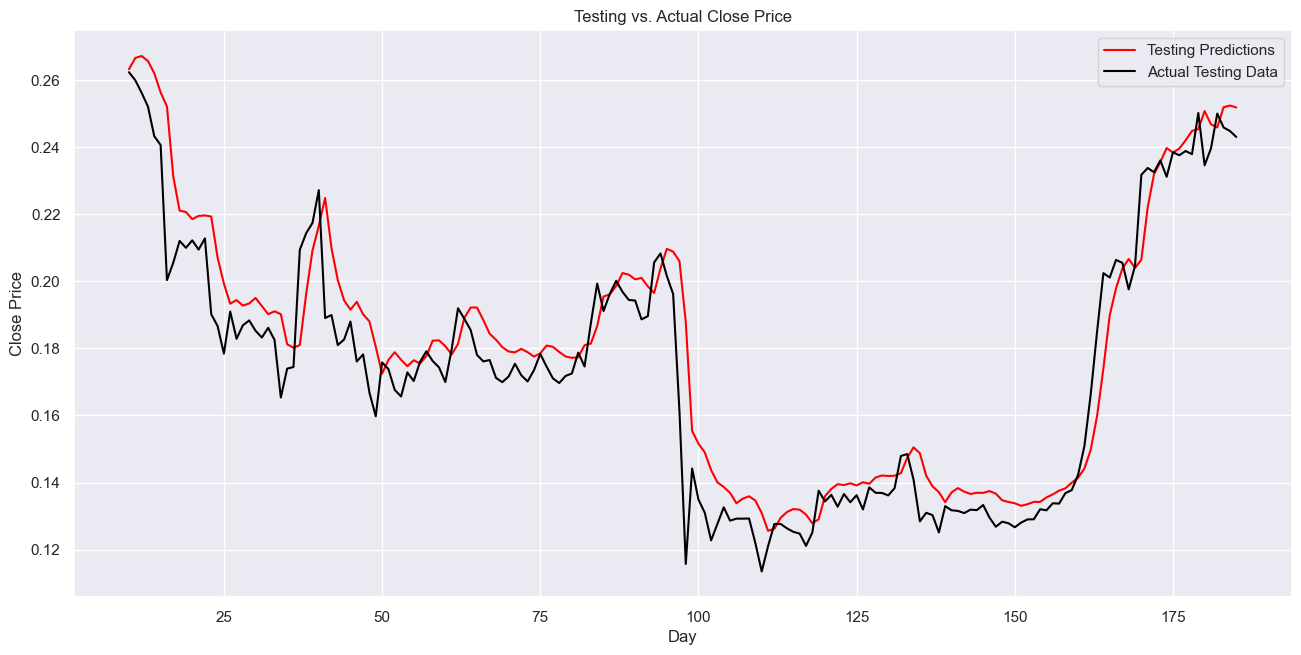

In [49]:
# Plot testing vs. actual
plt.figure(figsize=(14, 7))
plt.plot(np.arange(look_back, len(test_predict) + look_back), test_predict.ravel(), label='Testing Predictions', color='red')
plt.plot(np.arange(look_back, len(test_predict) + look_back), Y_test.ravel(), label='Actual Testing Data', color='black')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Testing vs. Actual Close Price')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_mae = mean_absolute_error(Y_train.ravel(), train_predict.ravel())
train_mse = mean_squared_error(Y_train.ravel(), train_predict.ravel())
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(Y_test.ravel(), test_predict.ravel())
test_mse = mean_squared_error(Y_test.ravel(), test_predict.ravel())
test_rmse = np.sqrt(test_mse)

print("Training Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")

print("\nTesting Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")


Training Metrics:
MAE: 0.023027846254888212
MSE: 0.0010231015758869887
RMSE: 0.03198595904278921

Testing Metrics:
MAE: 0.00931387172031854
MSE: 0.00016988288183067106
RMSE: 0.01303391275982278
